<a href="https://colab.research.google.com/github/Mohammad-Amirifard/ClimateFish_Analysis/blob/main/Part1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MTAFFI 2023 - Assignment

In this notebook, we are making our best effort to do specific anlaysis on ClimateFish dataset.

**Problem:** Do scientific analysis on ClimateFish Dataset

**Note1:** This notebook has been writen in [Google Colab platform](https://colab.research.google.com/). So, if you want to run it in other platforms, you should install mentioned packages inside this note.

**Note2:** By this [Link](https://drive.google.com/drive/u/0/folders/1g6m-xV1QAFCAi8lW2z30zJxLqd22wdHN), you can find all materiasl such as artciles, dataset and so on which are needed for this problem.

### 1-Import Datasets

####1-1 Mount Google Drive to colab to access your dataset

In [ ]:
from google.colab import drive
# mount google drive to /content directory. You can see your drive on the left pannel.
drive.mount('/content/drive')

Mounted at /content/drive


####1-2 Copy you datasets to the /content direcory of google colab

In [ ]:
# Here, /content/drive/MyDrive/Projects/ClimateFish/Dataset/Dataset_ClimateFish.csv is the address of dataset in my drive. You must replace it with yours.

!cp  "/content/drive/MyDrive/Dataset/Dataset_ClimateFish.csv" "/content"
!cp "/content/drive/MyDrive/Dataset/Dataset_description.csv" "/content"

### 2-Import  Libraries

In [ ]:
# To use map in our notebook . ! shows that we are dealing linux terminal
!pip install folium
import folium
# To use dataframes whem we are dealing with files like csv files
import pandas as pd
# To plot graphs
from matplotlib import pyplot as plt
# To have better view on our graphs
import seaborn as sns
# To use matrixes benefits
import numpy as np
# To have gird part in the background of our plots
from matplotlib import gridspec

### 3-Load dataset and its description from csv files

In [ ]:
dataset = pd.read_csv("/content/Dataset_ClimateFish.csv")
description = pd.read_csv("/content/Dataset_description.csv")

In [ ]:
1# Let's Look at dataset
print("\n")
print("*"*90,end='')
print(" Our ClimateFish Dataset ",end="*"*190)
# Show 10 first lines of dataset
dataset.head(10)



****************************************************************************************** Our ClimateFish Dataset **********************************************************************************************************************************************************************************************

,Record_ID,Year,Month,Day,Decimal_latitude,Decimal_longitude,Country,Study_area,Location,Depth,...,Siganus_luridus,Siganus_rivulatus,Sarpa_salpa,Serranus_scriba,Thalassoma_pavo,Pterois_miles,Stephanolopis_diaspros,Parupeneus_forskali,Pempheris_rhomboidea,Torquigener_flavimaculosus
0,1,2009,9,17.0,41.67093,9.385530,FR,SE Corsica,Capu di Fora,1_3,...,0,0,0,4,6,0,0,0,0,0
1,2,2009,9,17.0,41.67093,9.385530,FR,SE Corsica,Capu di Fora,1_3,...,0,0,0,0,3,0,0,0,0,0
2,3,2009,9,17.0,41.67093,9.385530,FR,SE Corsica,Capu di Fora,1_3,...,0,0,0,0,0,0,0,0,0,0
3,4,2009,9,17.0,41.67093,9.385530,FR,SE Corsica,Capu di Fora,1_3,...,0,0,9,0,1,0,0,0,0,0
4,5,2009,9,17.0,41.67093,9.385530,FR,SE Corsica,Capu di Fora,1_3,...,0,0,0,2,5,0,0,0,0,0
5,6,2009,9,17.0,41.67093,9.385530,FR,SE Corsica,Capu di Fora,1_3,...,0,0,0,1,8,0,0,0,0,0
6,7,2009,9,17.0,41.67093,9.385530,FR,SE Corsica,Capu di Fora,1_3,...,0,0,0,1,7,0,0,0,0,0
7,8,2009,9,17.0,41.67093,9.385530,FR,SE Corsica,Capu di Fora,1_3,...,0,0,7,0,6,0,0,0,0,0
8,9,2009,9,18.0,41.68940,9.392622,FR,SE Corsica,La Vardiola,1_3,...,0,0,30,3,1,0,0,0,0,0
9,10,2009,9,18.0,41.68940,9.392622,FR,SE Corsica,La Vardiola,1_3,...,0,0,17,2,1,0,0,0,0,0


###4_Remove useless columns
We decided to remove some useless columns such as ['Study_area','Data provider','Project'] from our dataset to show better performance.

In [ ]:
columns_list_to_remove = ['Study_area','Data provider','Project']
 # Drop columns specified in previous line
dataset.drop(labels=columns_list_to_remove,inplace=True,axis=1)
 # Show 10 first lines of dataset after removing unnecessaey info.
dataset.head(10)

,Record_ID,Year,Month,Day,Decimal_latitude,Decimal_longitude,Country,Location,Depth,Replicate,...,Siganus_luridus,Siganus_rivulatus,Sarpa_salpa,Serranus_scriba,Thalassoma_pavo,Pterois_miles,Stephanolopis_diaspros,Parupeneus_forskali,Pempheris_rhomboidea,Torquigener_flavimaculosus
0,1,2009,9,17.0,41.67093,9.385530,FR,Capu di Fora,1_3,1,...,0,0,0,4,6,0,0,0,0,0
1,2,2009,9,17.0,41.67093,9.385530,FR,Capu di Fora,1_3,2,...,0,0,0,0,3,0,0,0,0,0
2,3,2009,9,17.0,41.67093,9.385530,FR,Capu di Fora,1_3,3,...,0,0,0,0,0,0,0,0,0,0
3,4,2009,9,17.0,41.67093,9.385530,FR,Capu di Fora,1_3,4,...,0,0,9,0,1,0,0,0,0,0
4,5,2009,9,17.0,41.67093,9.385530,FR,Capu di Fora,1_3,5,...,0,0,0,2,5,0,0,0,0,0
5,6,2009,9,17.0,41.67093,9.385530,FR,Capu di Fora,1_3,6,...,0,0,0,1,8,0,0,0,0,0
6,7,2009,9,17.0,41.67093,9.385530,FR,Capu di Fora,1_3,7,...,0,0,0,1,7,0,0,0,0,0
7,8,2009,9,17.0,41.67093,9.385530,FR,Capu di Fora,1_3,8,...,0,0,7,0,6,0,0,0,0,0
8,9,2009,9,18.0,41.68940,9.392622,FR,La Vardiola,1_3,1,...,0,0,30,3,1,0,0,0,0,0
9,10,2009,9,18.0,41.68940,9.392622,FR,La Vardiola,1_3,2,...,0,0,17,2,1,0,0,0,0,0


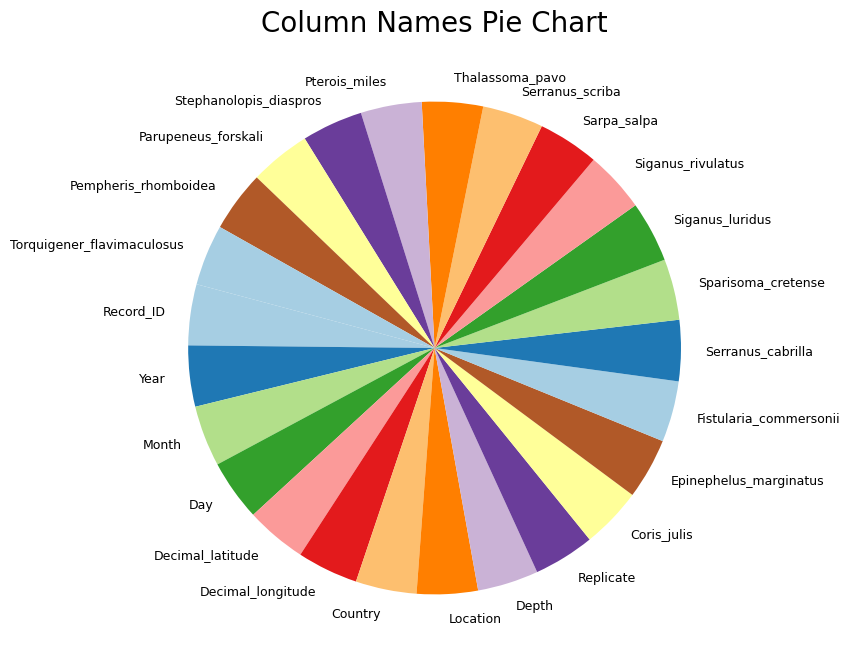

In [ ]:
#Let's look at columns' names and Plot them in a pie chart
# Define columns_list
columns_list = dataset.columns.tolist()
# set size of fugure
plt.figure(figsize=(8, 8))
plt.pie([1]*len(columns_list), labels=columns_list, startangle=165, colors=plt.cm.Paired.colors, textprops={'fontsize': 9})
plt.title('Column Names Pie Chart', size=20)
plt.show()

In [ ]:
# Let's check what each name of columns is telling us.
description.head(30)

,field,description;
0,Record_ID,A progressive number univocally identifying ea...
1,Year,The four-digit year in which the visual census...
2,Month,The two-digit month in which the visual census...
3,"Day,""The two-digit day in which the visual cen...",NaN
4,Decimal_latitude,Geographical latitude in decimal degrees of th...
5,Decimal_longitude,Geographical longitude in decimal degrees of t...
6,Country,The ISO code of the country in which the visua...
7,Study_area,The geographical context where the visual cens...
8,Location,The permanent location where the visual census...
9,Depth,The depth range at which the visual census tra...


###5_ Define some useful variables to use in following codes

In [ ]:
columns_list = dataset.columns
columns_list

Index(['Record_ID', 'Year', 'Month', 'Day', 'Decimal_latitude',
       'Decimal_longitude', 'Country', 'Location', 'Depth', 'Replicate',
       'Coris_julis', 'Epinephelus_marginatus', 'Fistularia_commersonii',
       'Serranus_cabrilla', 'Sparisoma_cretense', 'Siganus_luridus',
       'Siganus_rivulatus', 'Sarpa_salpa', 'Serranus_scriba',
       'Thalassoma_pavo', 'Pterois_miles', 'Stephanolopis_diaspros',
       'Parupeneus_forskali', 'Pempheris_rhomboidea',
       'Torquigener_flavimaculosus'],
      dtype='object')

In [ ]:
# Define years_list---> np.unique tries to find just unique items in sepcified column
years_list = list(np.unique(dataset['Year']))
years_list

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [ ]:
 # Define depths_list
fishes_list = list(dataset.columns[10:])
fishes_list

['Coris_julis',
 'Epinephelus_marginatus',
 'Fistularia_commersonii',
 'Serranus_cabrilla',
 'Sparisoma_cretense',
 'Siganus_luridus',
 'Siganus_rivulatus',
 'Sarpa_salpa',
 'Serranus_scriba',
 'Thalassoma_pavo',
 'Pterois_miles',
 'Stephanolopis_diaspros',
 'Parupeneus_forskali',
 'Pempheris_rhomboidea',
 'Torquigener_flavimaculosus']

In [ ]:
#we used link(https://fishbase.se/summary/10994n) for finding Mediterrian and non_Mediterrian fishes.
on_mediterrian_fishes=['Siganus_luridus','Siganus_rivulatus','Pterois_miles','Stephanolopis_diaspros','Parupeneus_forskali','Torquigener_flavimaculosus','Fistularia_commersonii','Pempheris_rhomboidea']


In [ ]:
 # put all indexes in a list
index_list = list(dataset['Record_ID'].index)
index_list[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# Define depths_list
depths_list = list(np.unique(dataset['Depth']))
depths_list

['11_20', '1_3', '21_30', '5_10']

In [ ]:
# Since depths list is showing depths not in order, we can make it in order by bellow code
depths_list = list(np.unique(dataset['Depth']))
swap = depths_list[0]
depths_list[0]=depths_list[1]
depths_list[1]= swap
#############
swap = depths_list[1]
depths_list[1] =depths_list[3]
depths_list[3] =swap
depths_list
##############
swap = depths_list[2]
depths_list[2] =depths_list[3]
depths_list[3] =swap
depths_list

['1_3', '5_10', '11_20', '21_30']

###6_Clean data
Here, we tried to report one mean value ,which has been rounded, per each fish for rows we have replicates.

In [ ]:
# Create an empty list to store data obtained in the following
values_list= []
# Create an empty list to store mean value of one fish per loop in replicated row
mean_list = []
# Create an empty dictionary to store all mean values of all fishes
mean_dict ={}

# Iterate in fish names.
for fish in fishes_list:
 # Create an empthy table which is a Dataframe
  clean_dataset = pd.DataFrame({})
# Iterate in index_list to find where we hava replicates
  for index in index_list:
# if index is equall to the first row of dataset or not
    if index == 0:

          #Yes it is
          # Store the number of one fish in value variable
          value = dataset[fish].iloc[index]
          # Add previos value to the values_list

          values_list.append(value)
          # add the first dataset row to clean_dataset
          clean_dataset =clean_dataset.append(dataset.iloc[index, :10], ignore_index=True)

    else:
           #Check if replicate of dataset rows with index = index is bigger than replicate of dataset rows with index = index-1
          if dataset['Replicate'].iloc[index]> dataset['Replicate'].iloc[index-1]:
            # Store the number of one fish in value variable
            value = dataset[fish].iloc[index]
            # Add previos value to the values_list
            values_list.append(value)

          else:
            # Store mean value of one fish counted in different replications
            mean = np.round(np.mean(values_list))
            # Add previos value to the mean_list
            mean_list.append(mean)
            # Make values empty again
            values_list=[]
            value = dataset[fish].iloc[index]
            values_list.append(value)
            clean_dataset =clean_dataset.append(dataset.iloc[index, :10], ignore_index=True)

  mean_dict[fish] = mean_list
  mean_list = []


<ipython-input-16-ef0d5d7aae35>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_dataset =clean_dataset.append(dataset.iloc[index, :10], ignore_index=True)
<ipython-input-16-ef0d5d7aae35>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_dataset =clean_dataset.append(dataset.iloc[index, :10], ignore_index=True)
<ipython-input-16-ef0d5d7aae35>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_dataset =clean_dataset.append(dataset.iloc[index, :10], ignore_index=True)
<ipython-input-16-ef0d5d7aae35>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_dataset =clean_dataset.append(dataset.iloc[index, :10], ignore_inde

In [ ]:
clean_dataset = clean_dataset.iloc[:-1]
# Create a loop to iterate in fishes_list and put mean values got before for each fish we have
for fish in fishes_list:
  clean_dataset.loc[:,fish] = mean_dict[fish]

In [ ]:
clean_dataset

,Record_ID,Year,Month,Day,Decimal_latitude,Decimal_longitude,Country,Location,Depth,Replicate,...,Siganus_luridus,Siganus_rivulatus,Sarpa_salpa,Serranus_scriba,Thalassoma_pavo,Pterois_miles,Stephanolopis_diaspros,Parupeneus_forskali,Pempheris_rhomboidea,Torquigener_flavimaculosus
0,1,2009,9,17.0,41.670930,9.385530,FR,Capu di Fora,1_3,1,...,0.0,0.0,2.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0
1,9,2009,9,18.0,41.689400,9.392622,FR,La Vardiola,1_3,1,...,0.0,0.0,24.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0
2,17,2009,9,18.0,41.640919,9.372925,FR,Punta Arasu,1_3,1,...,0.0,0.0,8.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0
3,25,2009,9,NaN,35.864130,12.882499,IT,Faraglioni di Linosa,1_3,1,...,0.0,0.0,11.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0
4,29,2009,9,NaN,35.875110,12.864366,IT,Mannarazza,1_3,2,...,0.0,0.0,13.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,3123,2021,9,23.0,43.198300,5.228500,FR,Planier,11_20,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
897,3127,2021,9,23.0,43.198300,5.228500,FR,Planier,5_10,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,3131,2021,9,21.0,43.187690,5.556000,FR,Soubeyran,11_20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
899,3135,2021,9,21.0,43.187690,5.556000,FR,Soubeyran,5_10,1,...,0.0,0.0,88.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
clean_dataset.to_csv('/content/clean_dataset.csv')

###7_First Analyse
Analyse fishes movement in depth in different years.
Graphs illustrate the fishes which were in the depth 1_3 in 2009, are moving to down by increasing temprature.  

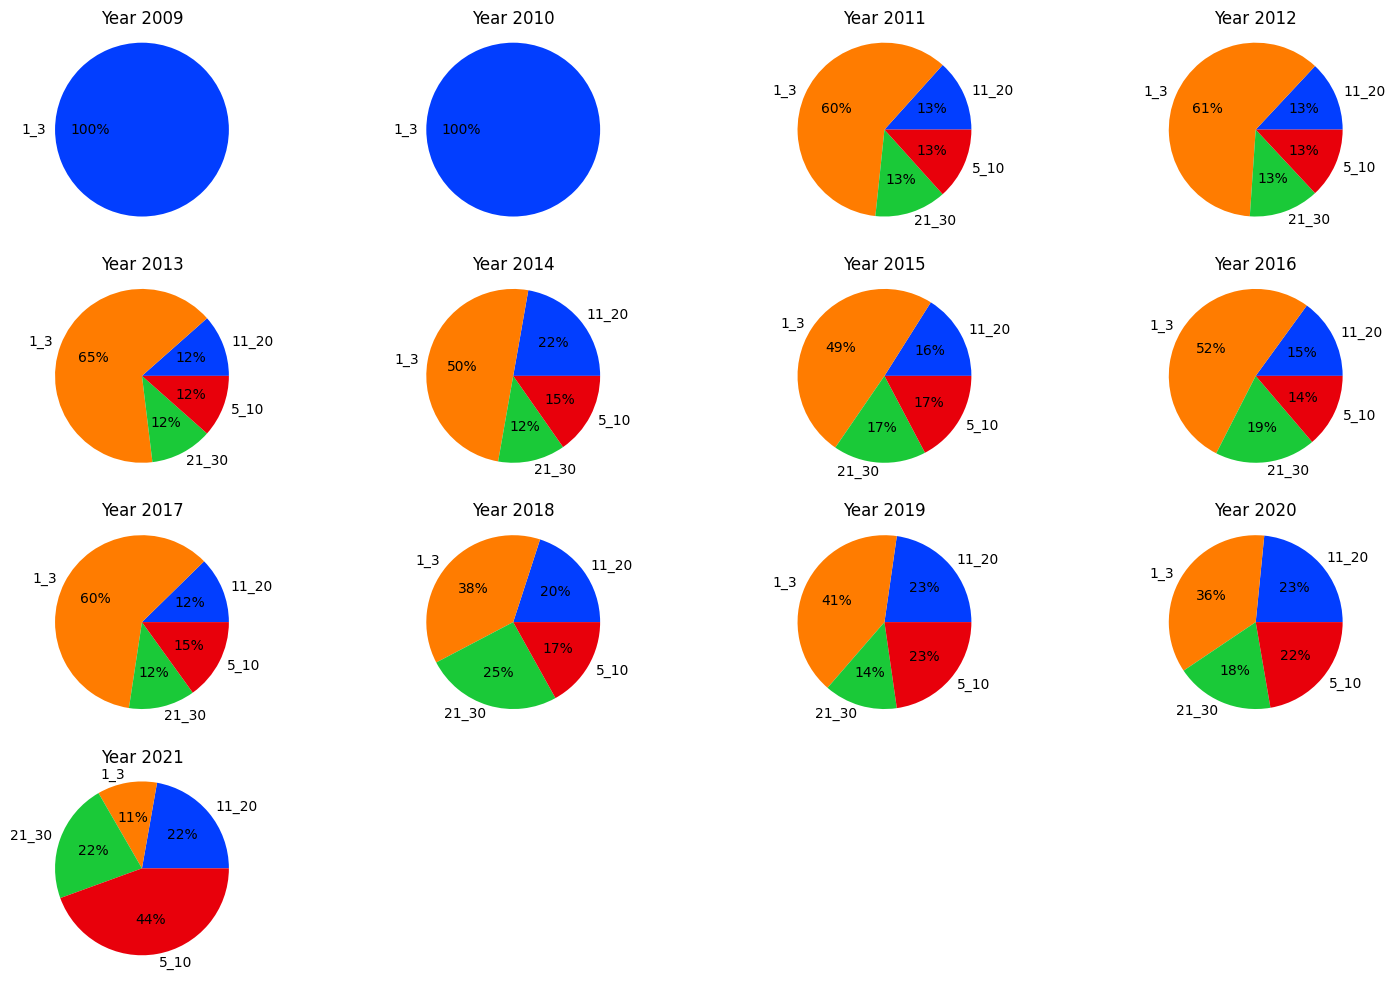

In [ ]:
# Since we have 13 years, we need to draw 13 pictures
# Set size of picture
fig = plt.figure(figsize=(15, 10))
 # Set color them for pie charts
palette_color = sns.color_palette('bright')

# Set number of rows and columns, including pictures
num_rows = 4
# Here, in order to avoid additional figure in space like 16 pictures in row,column = 4,4, we use this
num_cols = -(-13 // num_rows)
# Use fridSpec to specify a certainl  row, column to each picture
gs = gridspec.GridSpec(num_rows, num_cols, figure=fig)

 # Create a loop to itererat over 13 years and count number of fishes, available at each depth
for i, year in enumerate(years_list):

    # Select the current subplot
    row = i // num_cols
    col = i % num_cols
    ax = plt.subplot(gs[row, col])


    # Filter the dataset for the current year
    year_data = clean_dataset[clean_dataset['Year'] == year]

    # Create the pie chart
    # Shows Count number of fishes in the specified year in different depth
    fish_count = np.unique(year_data['Depth'], return_counts=True)[1]
    # Show reletaed depth of that count in previous code
    depth = np.unique(year_data['Depth'], return_counts=True)[0]
    # Draw plots so that x= number of fieshes count in that year
    ax.pie(x=fish_count,
           labels=depth,
           colors=palette_color,
           autopct='%.0f%%')

    # Set title for the subplot
    ax.set_title(f'Year {year}',y=+0.95)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

###8_Second Analyse
Analyse the most fishes in each year in different depths

In [ ]:
# Create a Table Datafream to store data in it
# Create a dictionary
dic = {}
# Pass the dictionary into table
table = pd.DataFrame(dic,index=depths_list)
 # Show table
table

""
1_3
5_10
11_20
21_30


In [ ]:
# Fill the above tale with appropriate values
# Create a loop to iterate years in years_list
for year in years_list:
   # Create a loop to iterate depth in depth_list
  for depth in depths_list:
# We made try function to avoid error while we have no data for some depth in some years
    try:
      available_fish_names_in_this_depth = list(clean_dataset[(clean_dataset['Year'] == year)&(clean_dataset['Depth']==depth)].loc[:,"Coris_julis":].sum(axis='rows').index)
      no_available_fish_names_in_this_depth =list(clean_dataset[(clean_dataset['Year'] == year)&(clean_dataset['Depth']==depth)].loc[:,"Coris_julis":].sum(axis='rows'))
       # Find the name and the  value of the most common fish
      max_value, fish_index = max((value, index) for index, value in zip(available_fish_names_in_this_depth,no_available_fish_names_in_this_depth))
      # Store this fish name, which the most common in that depth into the table created before
      table.at[year, depth] = fish_index


    except:
      table.at[year, depth] = np.NAN


In [ ]:
# Similar to before, we store the values of max number of the most common fishes in each year for all depths.
dic = {}
table1 = pd.DataFrame(dic)
  # Itererate in years_list to find the most fishes with their numbers in each year
for year in years_list:
  # Consider .loc[:,"Coris_julis":].sum(axis='rows') says make a sumation in columns including fishes names.
  fish_names = list(clean_dataset[clean_dataset['Year'] == year].loc[:,"Coris_julis":].sum(axis='rows').index)
  no_fishes =list(clean_dataset[clean_dataset['Year'] == year].loc[:,"Coris_julis":].sum(axis='rows'))
  max_value, fish_index = max((value, index) for index, value in zip(fish_names,no_fishes))
  table1.at['Name', year] = fish_index
  table1.at['Value', year] = max_value

table1

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Name,Sarpa_salpa,Thalassoma_pavo,Sarpa_salpa,Sarpa_salpa,Sarpa_salpa,Sarpa_salpa,Sarpa_salpa,Sarpa_salpa,Sarpa_salpa,Coris_julis,Coris_julis,Sarpa_salpa,Coris_julis
Value,196.0,74.0,1259.0,1110.0,1441.0,883.0,717.0,978.0,875.0,1066.0,864.0,2060.0,416.0


###9_Third Analyse
Analyse the number of each fishes in different years

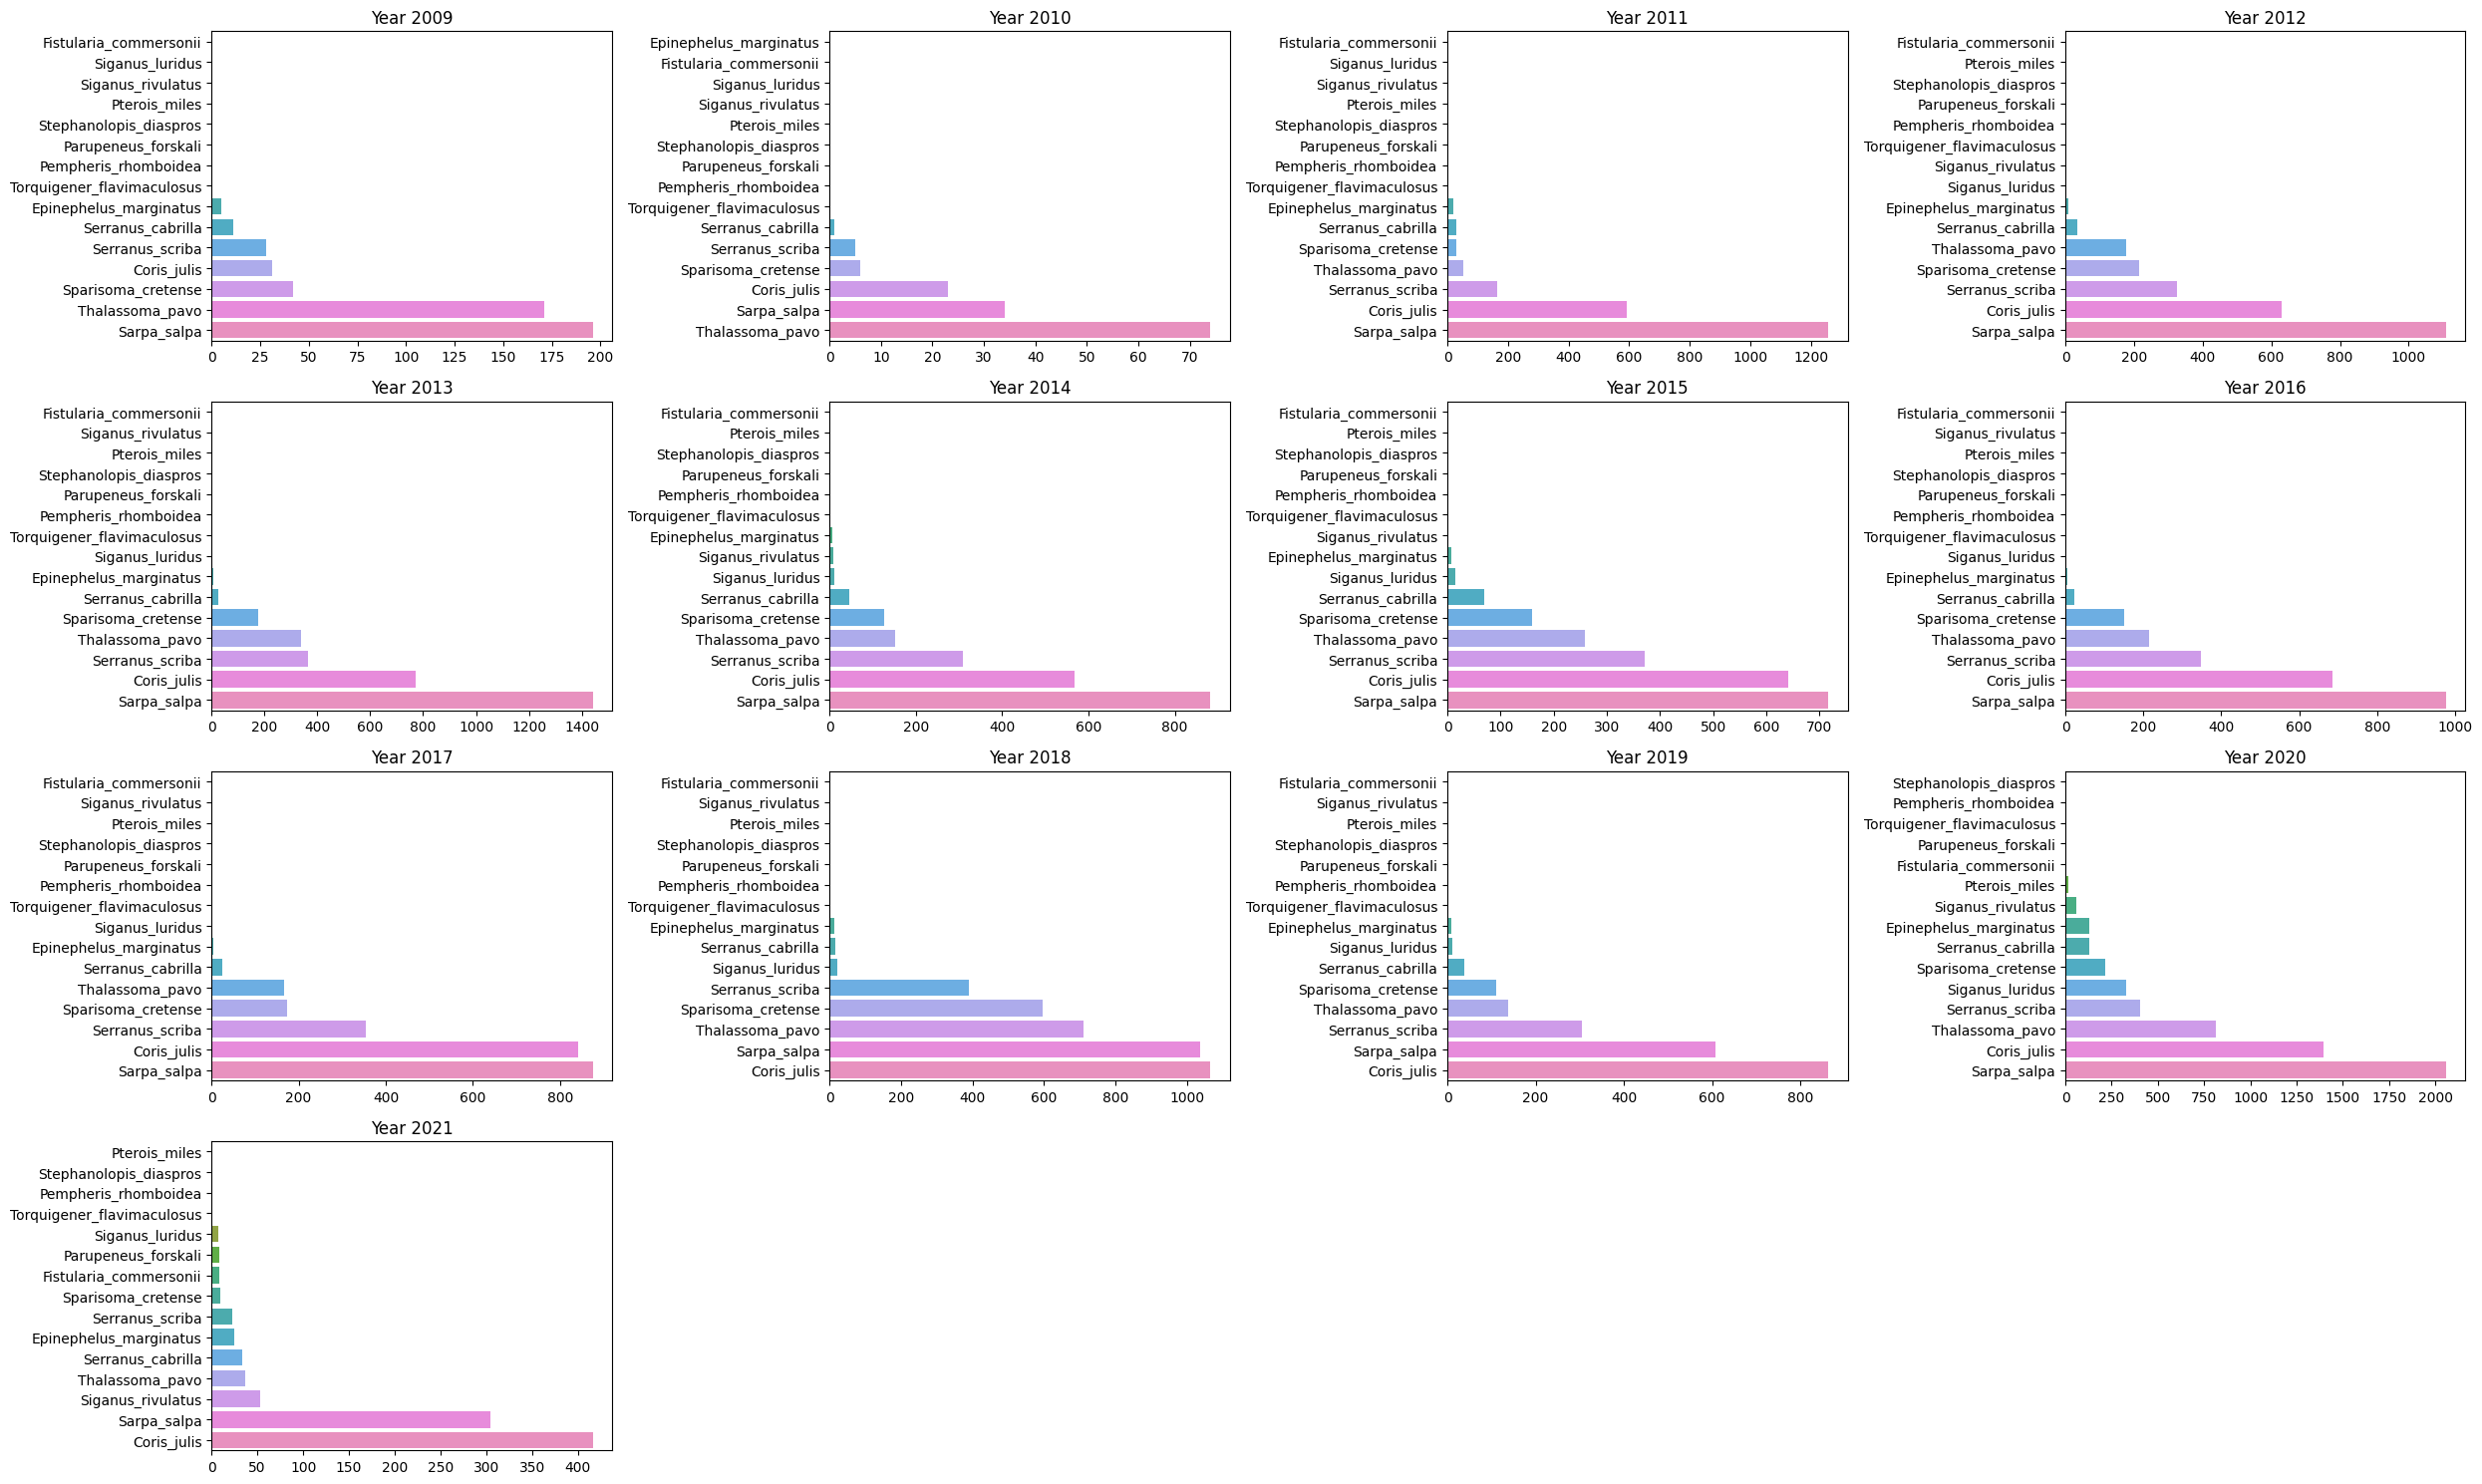

In [ ]:
num_rows = 4
num_cols = -(-13 // num_rows)
fig = plt.figure(figsize=(25, 15))
gs = gridspec.GridSpec(num_rows, num_cols, figure=fig)

for i, year in enumerate(np.unique(clean_dataset['Year'])):
    # Select the current subplot
    row = i // num_cols
    col = i % num_cols

    # Select the current subplot
    ax = plt.subplot(gs[row, col])


    # Filter the dataset for the current year
    year_data = clean_dataset[clean_dataset['Year'] == year]

    # Create the pie chart
    palette_color = sns.color_palette('bright')

    cunt_fishes =clean_dataset[clean_dataset['Year']==year].loc[:,"Coris_julis":].sum(axis='rows').sort_values()
    fishes_names = cunt_fishes.index
    sns.barplot(x=cunt_fishes,y=fishes_names)

    # Set title for the subplot
    ax.set_title(f'Year {year}')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

###10_Forth Analyse
Analyse the appearance of some new fishes in last years, while looking at each number of fished in different years

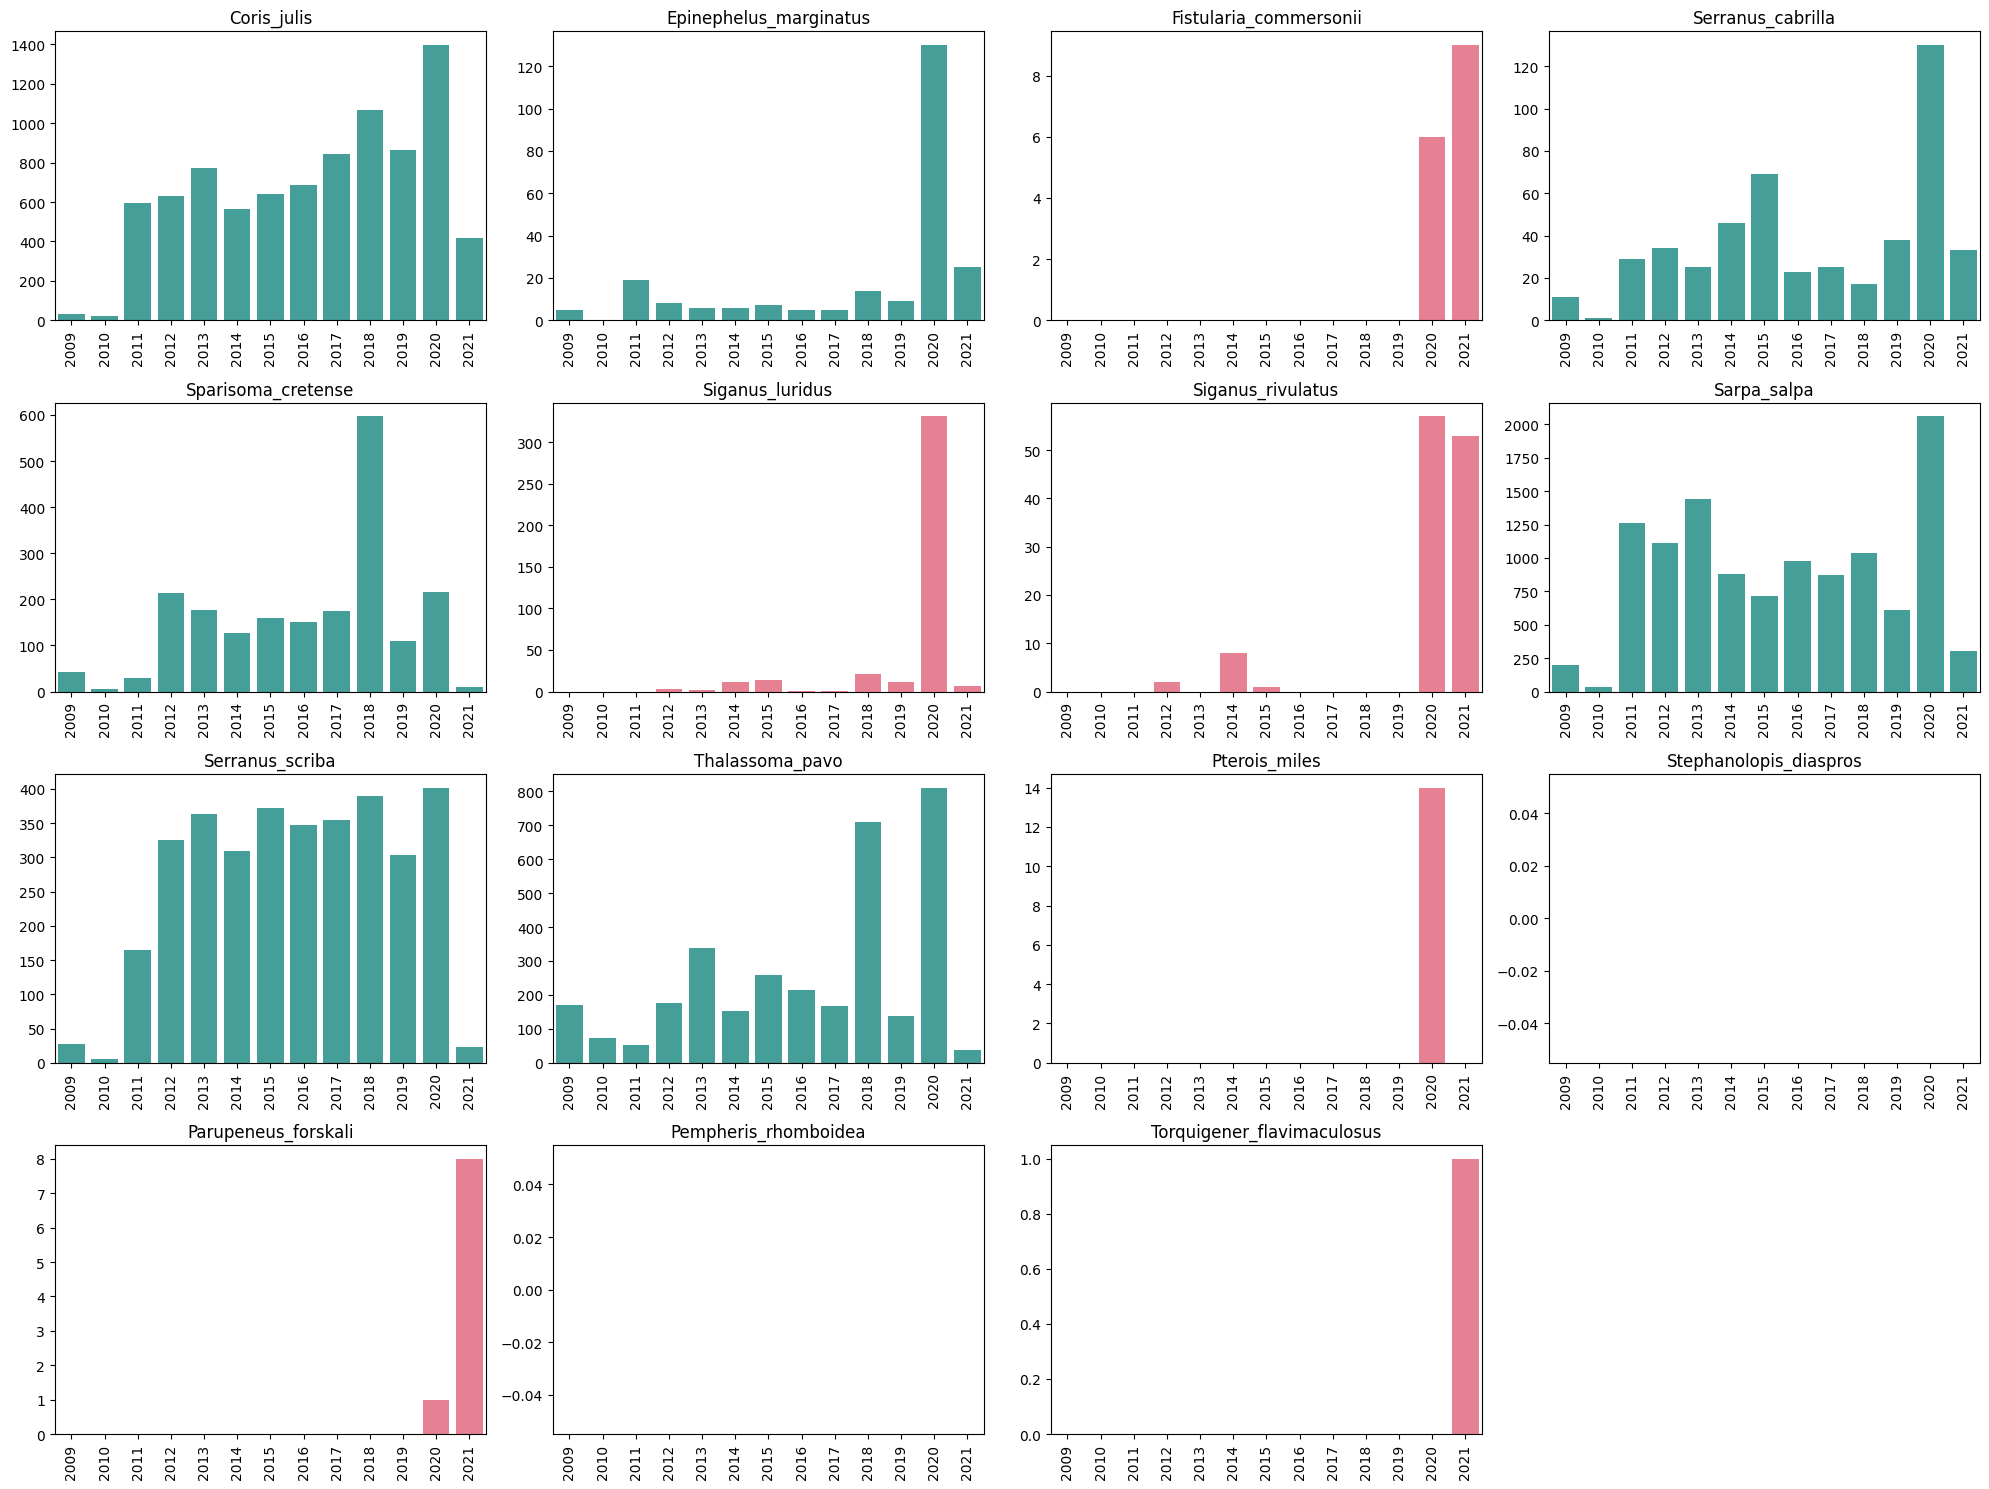

In [ ]:
# Assuming you have a defined list of fishes
defined_fishes_list = non_mediterrian_fishes

# Assuming you have a DataFrame named 'clean_dataset' with columns ['Year', 'Salmon', 'Tuna', 'Bass', 'Trout']
# and 'cunt_fishes' as a count of fishes

num_rows = 4
num_cols = -(-len(fishes_list) // num_rows)
fig = plt.figure(figsize=(20, 15))
gs = plt.GridSpec(num_rows, num_cols, figure=fig)

# Use two colors for both types of fishes
palette_color = sns.color_palette('husl', 2)
color_list = [palette_color[0] if fish in defined_fishes_list else palette_color[1] for fish in fishes_list]

for i, fish in enumerate(fishes_list):
    # Select the current subplot
    row = i // num_cols
    col = i % num_cols

    # Select the current subplot
    ax = plt.subplot(gs[row, col])

    # Create the bar plot
    sum_values = [clean_dataset[clean_dataset['Year'] == year][fish].sum() for year in years_list]
    sns.barplot(x=years_list, y=sum_values, color=color_list[i])

    # Set title for the subplot
    ax.set_title(f'{fish}')
    ax.set_xticklabels(labels=years_list, rotation=90)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



###10_Fifth Analyse
Analyase the movement of Thalassoma_pavo fish between 2009 and 2020.We rejected considering 2021, since we think 2021 data is not complete as much as 2020 data is.

In [ ]:
A=clean_dataset[(clean_dataset['Thalassoma_pavo']>=1)&(clean_dataset["Year"]==2009)] [["Decimal_latitude","Decimal_longitude","Thalassoma_pavo"]] # Find all locations of this fish where at least on number of that fish is available and when year is 2009
B =clean_dataset[(clean_dataset['Thalassoma_pavo']>=0)&(clean_dataset["Year"]==2020)] [["Decimal_latitude","Decimal_longitude","Thalassoma_pavo"]] # Find all locations of this fish where at least on number of that fish is available and when year is 2020

In [ ]:
# look at statistical values of these data
A.describe()

,Decimal_latitude,Decimal_longitude,Thalassoma_pavo
count,9.000000,9.000000,9.000000
mean,39.041485,11.158127,19.000000
std,2.790435,3.779486,14.568802
min,35.862072,3.221600,1.000000
25%,35.875110,9.385530,7.000000
50%,38.269900,12.852900,16.000000
75%,41.670930,12.882499,34.000000
max,42.233000,15.225400,35.000000


In [ ]:
B.describe()

,Decimal_latitude,Decimal_longitude,Thalassoma_pavo
count,175.000000,175.000000,175.000000
mean,41.224453,11.639174,4.634286
std,2.729388,4.161982,6.795280
min,37.647239,3.145136,0.000000
25%,38.695020,9.777716,0.000000
50%,40.875366,13.183020,1.000000
75%,44.887700,13.726111,8.000000
max,44.941266,20.985041,33.000000


In [ ]:
# Draw the map and put locations on it as stasrt and end ponts
# Coordinates for location A (starting point)
latitude_A, longitude_A = 41.670930, 9.372925

# Coordinates for location B (ending point)
latitude_B, longitude_B = 44.887700,13.75136

# To see neighbours of points we have:
# Create a folium map centered around the midpoint of A and B
midpoint_latitude = (latitude_A + latitude_B) / 2
midpoint_longitude = (longitude_A + longitude_B) / 2
my_map = folium.Map(location=[midpoint_latitude, midpoint_longitude], zoom_start=6)

# Add markers for locations A and B
folium.Marker([latitude_A, longitude_A], popup='Location A for Thalassoma_pavo',icon=folium.Icon(color='green')).add_to(my_map)
folium.Marker([latitude_B, longitude_B], popup='Location B for Thalassoma_pavo',icon=folium.Icon(color='red')).add_to(my_map)

# Draw a line (arrow) from A to B
folium.PolyLine([(latitude_A, longitude_A), (latitude_B, longitude_B)],
                color='blue',
                weight=2.5,
                 # Customize the dash_array to create arrow-like lines
                dash_array=[10, 20],
                popup='Arrow from A to B').add_to(my_map)

# Save the map to an HTML file or display it in a Jupyter Notebook
# Save to an HTML file
my_map.save('my_map_with_arrow.html')
my_map



In [ ]:
D=clean_dataset[(clean_dataset['Sparisoma_cretense']>=1)&(clean_dataset["Year"]==2009)] [["Decimal_latitude","Decimal_longitude","Sparisoma_cretense"]] # Find all locations of this fish where at least on number of that fish is available and when year is 2009
E =clean_dataset[(clean_dataset['Sparisoma_cretense']>=1)&(clean_dataset["Year"]==2020)] [["Decimal_latitude","Decimal_longitude","Sparisoma_cretense"]] # Find all locations of this fish where at least on number of that fish is available and when year is 2020
D.describe()


,Decimal_latitude,Decimal_longitude,Sparisoma_cretense
count,4.000000,4.000000,4.000000
mean,36.467303,13.456266,10.500000
std,1.200412,1.179419,6.608076
min,35.862072,12.852900,1.000000
25%,35.863616,12.861500,8.500000
50%,35.869620,12.873432,13.000000
75%,36.473307,13.468199,15.000000
max,38.267900,15.225300,15.000000


In [ ]:
E.describe()

,Decimal_latitude,Decimal_longitude,Sparisoma_cretense
count,18.000000,18.000000,18.000000
mean,38.306911,16.171081,11.944444
std,0.506701,3.888160,14.102450
min,37.647239,13.151140,1.000000
25%,37.708662,13.151140,1.000000
50%,38.697730,13.167080,2.000000
75%,38.700440,20.867992,27.000000
max,38.700440,20.985041,35.000000


In [ ]:
# Draw the map and put locations on it as stasrt and end ponts
# Coordinates for location A (starting point)
latitude_D, longitude_D = 36.0531, 14.18566

# Coordinates for location B (ending point)
latitude_E, longitude_E = 37.03263,10.89848

# To see neighbours of points we have:
# Create a folium map centered around the midpoint of D and E
midpoint_latitude = (latitude_D + latitude_E) / 2
midpoint_longitude = (longitude_D + longitude_E) / 2
my_map = folium.Map(location=[midpoint_latitude, midpoint_longitude], zoom_start=6)

# Add markers for locations D and E
folium.Marker([latitude_D, longitude_D], popup='Location D for Sparisoma_cretense',icon=folium.Icon(color='purple')).add_to(my_map)
folium.Marker([latitude_E, longitude_E], popup='Location E for Sparisoma_cretense',icon=folium.Icon(color='black')).add_to(my_map)

# Draw a line (arrow) from D to E
folium.PolyLine([(latitude_D, longitude_D), (latitude_E, longitude_E)],
                color='blue',
                weight=2.5,
                # Customize the dash_array to create arrow-like lines
                dash_array=[10, 20],
                popup='Arrow from D to E').add_to(my_map)

# Save the map to an HTML file or display it in a Jupyter Notebook
 # Save to an HTML file
my_map.save('my_map_with_arrow.html')
my_map

